일반적인 특성의 전형적인 형태는 **범주형 특성** 또는 **이산형 특성**
> 범주형 특성의 예 : 제품의 브랜드, 색상, 판매 분류

특정 애플리케이션에 가장 적합한 데이터 표현을 찾는 것 --> **특성공학**


## 범주형 변수

**adult 데이터 셋**
age , hours-per-week : 연속형 특성
workclass, education, sex, occupation : 범주형 특성


### 원-핫-인코딩(가변수)
> 범주형 변수를 표현하는데 가장 많이 쓰이는 방법 

workclass 특성에 "Government Employee", "Private Employee", "Self Employed", "Self Employed Incorporated"란 특성이 있다고 하고, 만약 한 사람이 Private Employee일 때 0 1 0 0 으로 각각 특성에 맞는 값이 할당된다 -> **1이 특성들 중에 하나만 배치된다. : 원-핫-인코딩**



In [3]:
import os
import mglearn
import pandas as pd

data = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "adult.data"), header = None, index_col = False,
    names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','incom'])
data = data[['age','workclass','education','gender','hours-per-week','occupation','incom']]
display(data.head())


,age,workclass,education,gender,hours-per-week,occupation,incom
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [4]:
print(data.gender.value_counts())
#유일한 값이 각각 몇 번 나오는지 출력하는 메서드

 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("원본 특성\n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성:\n", list(data_dummies.columns))
#get dummies는 인코딩을 해주는 메서드
#출력 결과를 보면 범주형 특성이 확장된 것을 볼 수 있다.


원본 특성
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'incom'] 

get_dummies 후의 특성:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Ot

In [6]:
display(data_dummies.head())

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,incom_ <=50K,incom_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
# 모델 학습을 위해서 income 특성 분리
features = data_dummies.loc[:,'age':'occupation_ Transport-moving']
X = features.values
y = data_dummies['incom_ >50K'].values
print("X.shape: {} y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44) y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("테스트 점수: {:.2f}".format(logreg.score(X_test, y_test)))

테스트 점수: 0.81


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### 숫자로 표현된 범주형 특성
> 범주형 특성이 숫자로 되어있을 때

get dummies 함수는 숫자 특성은 모두 연속형이라고 생각 --> 가변수를 만들지 않음


In [9]:
demo_df = pd.DataFrame({'숫자 특성': [0,1,2,1], '범주형 특성': ['양말','여우','양말','상자']})
display(demo_df)

,숫자 특성,범주형 특성
0,0,양말
1,1,여우
2,2,양말
3,1,상자


In [10]:
display(pd.get_dummies(demo_df))
# 문자로 된 특성만 가변수가 생김

,숫자 특성,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,0,0,1,0
1,1,0,0,1
2,2,0,1,0
3,1,1,0,0


In [11]:
# 숫자 특성도 가변수로 만들고 싶으면 columns 매개변수에 인코딩하고 싶은 열을 명시해야함
demo_df['숫자 특성'] = demo_df['숫자 특성'].astype(str)
display(pd.get_dummies(demo_df, columns=['숫자 특성','범주형 특성']))

,숫자 특성_0,숫자 특성_1,숫자 특성_2,범주형 특성_상자,범주형 특성_양말,범주형 특성_여우
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,1,0,1,0
3,0,1,0,1,0,0




## OneHotEncoder와 ColumnTransformer

OneHotEncoder은 모든 열에 인코딩을 수행한다. 


In [12]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
print(ohe.fit_transform(demo_df))
# 넘파이 배열을 반환한 것이기 때문에 열이름이 없음 -> 열 이름 얻으려면 get_feature_names 사용

[[1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0.]]


In [13]:
print(ohe.get_feature_names())

['x0_0' 'x0_1' 'x0_2' 'x1_상자' 'x1_양말' 'x1_여우']


ColumnTransformer는 입력 데이터에 있는 열마다 다른 변환을 적용할 수 있음
> 연속형 변수인 age, hours-per-week의 스케일 조정에도 필요함

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age','hours-per-week']),
    ("onehot", OneHotEncoder(sparse = False), ['workclass','education','gender', 'occupation'])])

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("incom", axis = 1)
X_train, X_test, y_train, y_test = train_test_split(
data_features, data.incom, random_state = 0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [16]:
#로지스틱 회귀로 학습
logreg = LogisticRegression()
logreg.fit(X_train_trans ,y_train)
X_test_trans = ct.transform(X_test)
print("테스트 점수: {:.2f}".format(logreg.score(X_test_trans, y_test)))

테스트 점수: 0.81


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


스케일을 넣은것이 큰 영향이 없다. 
하나의 변환기로 모든 전처리 단계를 캡츌화 하면 장점이 있다. 

columnTransformer 안의 단계에 접근하려면 named_transformers_속성을 사용


In [17]:
ct.named_transformers_.onehot

OneHotEncoder(sparse=False)



## make_column_transformer로 간편하게 ColumnTransformer 만들기

클래스 이름을 기반으로 자동으로 각 단계의 이름을 붙여주는 **make_column_transformer**



In [18]:
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (['age', 'hours-per-week'], StandardScaler()), (['workclass','education','gender', 'occupation'], OneHotEncoder(sparse = False)))


## 구간 분할, 이산화 그리고 선형 모델, 트리 모델

데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다르다.

**wave로 선형 회귀 모델과 결정 트리 회귀 비교**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

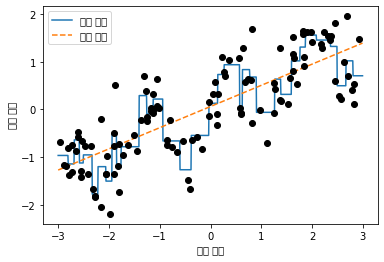

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
import numpy as np
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_wave(n_samples = 120)
line = np.linspace(-3,3,1000, endpoint= False).reshape(-1,1)

reg = DecisionTreeRegressor(min_samples_leaf = 3).fit(X, y)
plt.plot(line, reg.predict(line), label = "결정 트리")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), '--', label="선형 회귀")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")

연속형 데이터에 아주 강력한 선형 모델을 만드는 방법 하나는 한 특성을 여러 특성으로 나누는 **구간 분할**이다. 

구간의 경계를 정의하는 방법
1. 균일한 너비로
2. 데이터의 분위(데이터가 많은 구간은 좁아진다.)



In [20]:
from sklearn.preprocessing import KBinsDiscretizer

kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)
#bin_edges_ -> 특성별로 경곗값 저장

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
       -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
        2.92132162])]


In [21]:
X_binned = kb.transform(X) # 각 데이터 포인트를 해당되는 구간으로 인코딩할 수 있음(희소 행렬)
X_binned

<120x10 sparse matrix of type '<class 'numpy.float64'>'
	with 120 stored elements in Compressed Sparse Row format>

In [22]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

각 데이터 포인트가 어느 구간에 속했는지 범주형 특성으로 변환하였음

encode = 'ordinal' : 원-핫-인코딩된 구간의 인덱스 바로 계산
encode = 'onehot-dense' : 원-핫-인코딩된 밀집 배열을 만듬 -> 모든 특성 바로 출력 가능


Text(0.5, 0, '입력 특성')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

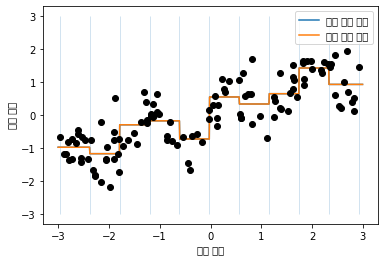

In [23]:
kb = KBinsDiscretizer(n_bins = 10, strategy = 'uniform', encode = 'onehot-dense')
kb.fit(X)
X_binned = kb.transform(X) #해당되는 구간으로 인코딩함 

line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label = '구간 선형 회귀')

reg = DecisionTreeRegressor(min_samples_split = 3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label ='구간 결정 트리')
plt.plot(X[:,0], y, 'o', c= 'k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")


선형 회귀 모델과 결정트리가 같은 예측을 함
선형 모델은 훨씬 유연해지고(득), 결정트리는 덜 유연해짐(실)
> 데이터가 크고, 선형 모델을 사용해야한다면 구간분할이 좋은 방법이다. 



## 상호작용과 다항식

+ **상호작용, 다항식** : 특성을 풍부하게 나타내는 또 하나의 방법
전 그래프에서는 상숫값을 학습 -> 기울기를 학습시킬 수 있음(분할된 데이터에 원래 특성(x축)을 다시 추가한다.

In [24]:
X_combined = np.hstack([X, X_binned])
print(X.shape)
print(X_binned.shape)
# X_binned -> 이산화 시킨 것
# hstack -> 수평 병합
print(X_combined.shape) 

(120, 1)
(120, 10)
(120, 11)


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

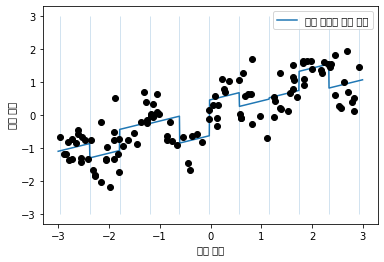

In [25]:
reg = LinearRegression().fit(X_combined, y) #선형 모델 학습
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label = '원본 특성을 더한 회귀')

plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha = .2)
plt.legend(loc = "best")
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.plot(X[:,0], y, 'o', c= 'k')

위의 그림은 절편과 기울기를 학습한 결과다.
+ 기울기가 일정하게 증가하는 형태로 각 구간이 일치한다. -> x특성이 하나이다. 
 >> 해결책 : 데이터 포인트가 있는 구간과 x축 사이의 상호작용 특성을 추가한다. 
 >> 구간 특성(X_binned)과 원본 특성의 곱

In [26]:
print(X_binned.shape)
print((X*X_binned).shape)
X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape) #20개의 특성으로 변함

(120, 10)
(120, 10)
(120, 20)


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

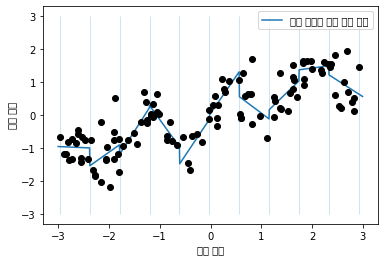

In [27]:
reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.plot(line, reg.predict(line_product), label = '원본 특성을 곱한 선형 회귀')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth = 1, alpha= .2)
plt.plot(X[:, 0], y, 'o', c= 'k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc = "best")

각 구간에서 절편과 기울기가 모두 다름
>> 곱말고도 x^2, x^3과 같은 것도 있음 
+ preprocessing 모듈의 polynomialfeatures에 구현이 되어있음


In [28]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 10, include_bias = False)# 특성 10개, x^10까지 고차항 
poly.fit(X)
X_poly = poly.transform(X)

print("X_poly.shape: ", X_poly.shape)


X_poly.shape:  (120, 10)


In [29]:
print("X 원소 :\n", X[:5])
print("X_poly 원소 :\n", X_poly[:5])

X 원소 :
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
X_poly 원소 :
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

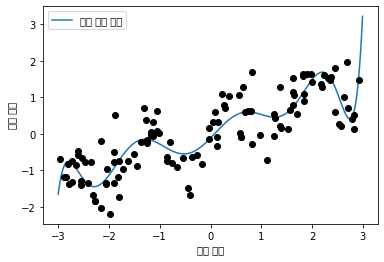

In [30]:
#다항 회귀 : 다항식 특성을 선형 모델과 함께 사용
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label = '다항 선형 회귀')
plt.plot(X[:,0], y, 'o', c= 'k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc = "best")

1차원 데이터셋에서도 부드러운 곡선을 만든다, 하지만 데이터가 부족시에 고차원 다항식은 민감하게 반응

**SVM모델과 비교**

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51077 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47141 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54924 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44480 missing from c

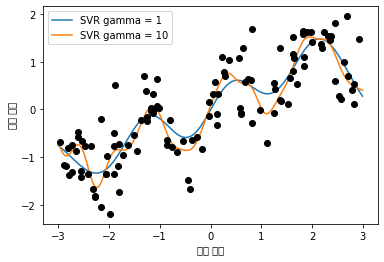

In [31]:
from sklearn.svm import SVR

for gamma in[1, 10]:
    svr = SVR(gamma = gamma).fit(X,y)
    plt.plot(line, svr.predict(line), label = "SVR gamma = {}".format(gamma))
    
plt.plot(X[:,0], y, 'o', c = 'k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc = "best")

복잡한 모델svm과 다항 회귀와 비슷한 복잡도의 예측을 만듬

**상호작용과 다항식의 다른 예**


In [32]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state = 0)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [33]:
poly = PolynomialFeatures(degree = 2).fit(X_train)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train.shape :", X_train.shape)
print("X_train_poly.shape : ", X_train_poly.shape)

X_train.shape : (379, 13)
X_train_poly.shape :  (379, 105)


원래 특성이 13개에서 105개로 확장됨

**상호작용 특성이 있는 데이터와 없는 데이터**

In [34]:
#비교적 간단한 Ridge
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(ridge.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.577
상호작용 특성이 있을 때 점수 : 0.741


In [35]:
#복잡한 모델의 랜덤 포레스트
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 100, random_state= 0).fit(X_train_scaled, y_train)
print("상호작용 특성이 없을 때 점수 : {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators= 100, random_state= 0).fit(X_train_poly, y_train)
print("상호작용 특성이 있을 때 점수 : {:.3f}".format(rf.score(X_test_poly, y_test)))

상호작용 특성이 없을 때 점수 : 0.785
상호작용 특성이 있을 때 점수 : 0.761



## 일변량 비선형 변환

대부분의 모델은 각 특성이 정규분포와 비슷할 때 최고의 성능을 낸다. 
> 편법으로 log, exp사용
> ex) 정수 카운트 데이터 (음수가 없으며 특별한 통계 패턴을 따르는 경우가 많음)


In [36]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size = (1000, 3))
w = rnd.normal(size = 3)

X = rnd.poisson(10*np.exp(X_org))
y = np.dot(X_org, w)
print(X[:10, 0])

#각 값이 나타낸 횟수 출력
#bincount는 0부터 시작
print("특성 출현 횟수:\n", np.bincount(X[:, 0]))

[ 56  81  25  20  27  18  12  21 109   7]
특성 출현 횟수:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, '값')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44050 missing from c

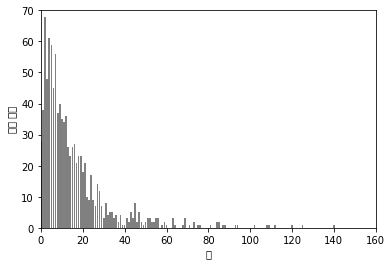

In [37]:
#시각화
plt.xlim(0,160)
plt.ylim(0, 70)
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color ='grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [38]:
# 위 데이터 모양(치우쳐진)에 선형 회귀 

from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0)
score= Ridge().fit(X_train, y_train).score(X_test, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.622


Text(0.5, 0, '값')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54788 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54943 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 44050 missing from c

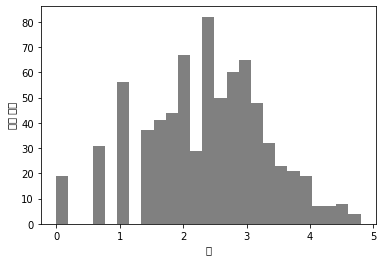

In [39]:
#정규 분포로 log스케일
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test +1)

plt.hist(X_train_log[:,0], bins = 25, color = 'grey')
plt.ylabel("출현 횟수")
plt.xlabel("값")

In [40]:
score= Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("테스트 점수:{:.3f}".format(score))

테스트 점수:0.875


이러한 변환은 트리 기반 모델에서는 불필요하지만 선형 모델에서는 필수이다. 
SVM, 최근접 이웃, 신경망 같은 모델은 구간 분할, 상호작용, 다항식으로 이득을 보지만, 선형 모델보다는 영향이 뚜렷하지 않는다.


## 특성 자동 선택
특성을 무한장 만들어낼 수 있음 -> 과대적합, 모델의 복잡성 
> 가장 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는 것이 좋다. 


 **유용한 특성 알아내기**
 + 일변량 통계, 모델 기반 선택, 반복적 선택
 + 지도학습 방법 -> 타깃값 필요
 + 훈련 데이터만 특성 선택에 사용 해야 함
 
 ### 일변량 통계
 
> 개개의 특성과 타깃 사이에 중요한 통계적 관계가 있는지 계산
> 일변량 : 각 특성이 독립적으로 평가된다.

**scikit-learn**
+ 분류 : f_classif, 회귀 : f_regression을 보통사용
+ p값에 기초하여 특성을 제외 (큰값일수록 연관성 x)
+ 임계값 계산 : SelectKBest(고정된 k개만큼 특성 선택), SelectPercentile(지정된 비율만큼 특성 선택)




X_train.shape (284, 80)
X_train_selected.shape: (284, 40)
[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


([<matplotlib.axis.YTick at 0x185530d7250>], [Text(0, 0, '')])

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

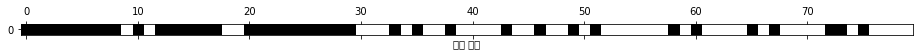

In [41]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.model_selection import train_test_split
import numpy as np

cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size = (len(cancer.data), 50))
X_w_noise = np.hstack([cancer.data, noise]) #왼쪽엔 원본특성, 오른쪽은 노이즈

X_train , X_test, y_train, y_test= train_test_split(
    X_w_noise, cancer.target, random_state = 0, test_size = .5)

select = SelectPercentile(score_func=f_classif, percentile = 50)
#특성의 50%를 선택함
select.fit(X_train, y_train)#적용
X_train_selected = select.transform(X_train)

print("X_train.shape", X_train.shape)
print("X_train_selected.shape:", X_train_selected.shape)

#get_support : 선택된 특성을 불리언 값으로 표시
mask = select.get_support()
print(mask)

#True는 검은색, False는 흰색으로 마스킹

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("특성 번호")
plt.yticks([0])

대부분 노이즈는 빠지고 원본 특성이 선택됨

**전체 선택vs 일부 선택**

In [42]:
from sklearn.linear_model import LogisticRegression

X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("전체 특성을 사용한 점수: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("선택된 일부 특성을 사용한 점수 :{:.3f}".format(lr.score(X_test_selected, y_test)))

전체 특성을 사용한 점수: 0.919
선택된 일부 특성을 사용한 점수 :0.912


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_



### 모델 기반 특성 선택
> 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 특성들만 선택한다.
> L1규제는 모델의 특성 선택을 위해 전처리 단계로 사용할 수 있음

**feature_importances_** : 각 특성의 중요도를 담음
**SelectFromModel** : 모델 기반의 특성 선택

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators = 100, random_state = 42), threshold = "median")

#selectfrommodel은 중요도가 지정한 임계치보다 큰 모든 특성을 선택한다.

In [44]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape:", X_train.shape)
print("X_train_l1.shape:", X_train_l1.shape)

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


Text(0.5, 0, '특성 번호')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

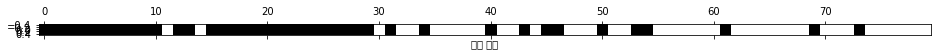

In [45]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel("특성 번호")

두개를 제외하고 원본 특성이 선택됨, 일부 노이즈가 선택되기도함



In [46]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("테스트 점수: {:.3f}".format(score))
#특성선택이 잘 되었음

테스트 점수: 0.930


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### 반복적 특성 선택

**반복적 특성 선택** : 특성의 수가 각기 다른 일련의 모델이 만들어짐 (제거, 추가 방식)
**재귀적 특성 제거** : 모든 특성들을 시작으로 중요도가 가장 낮은 것을 하나씩 제거해감



Text(0.5, 0, '특성 번호')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48264 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54840 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49457 missing from cur

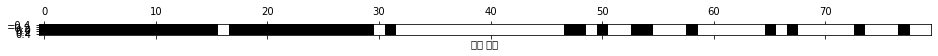

In [47]:
from sklearn.feature_selection import RFE

select = RFE(RandomForestClassifier(n_estimators = 100, random_state = 42), n_features_to_select = 40)

select.fit(X_train, y_train)
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap ='gray_r')
plt.xlabel("특성 번호")

전에 것보다는 특성 선택이 괜찮아짐

In [48]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("테스트 점수:{:.3f}".format(score))


테스트 점수:0.930


C:\Users\dkstj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


특성 선택이 제대로 되면 선형 모델의 성능은 랜덤 포레스트와 견줄만함


## 전문가 지식 활용



In [49]:
citibike = mglearn.datasets.load_citibike()
print("시티 바이크 데이터:\n", citibike.head())

시티 바이크 데이터:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


Text(0, 0.5, '대여횟수')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

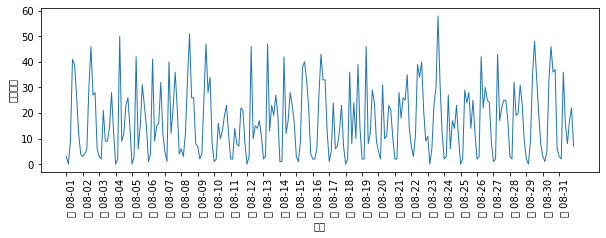

In [50]:
plt.figure(figsize = (10, 3))
xticks = pd.date_range(start = citibike.index.min(), end=citibike.index.max(), freq = 'D')
week = ["일","월","화","수","목","금","토"]
xticks_name = [week[int(w)]+ d for w, d, in zip(xticks.strftime("%w"), xticks.strftime(" %m-%d"))]
plt.xticks(xticks,xticks_name, rotation = 90, ha="left")
plt.plot(citibike, linewidth = 1)
plt.xlabel("날짜")
plt.ylabel("대여횟수")

주말과 평일, 아침과 밤과의 관계가 드러남
시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식을 사용함
> 어떤 날짜를 기점으로 그 전을 훈련데이터로, 그 후를 테스트 데이터로 삼음



In [51]:
y = citibike.values
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype("int64").values.reshape(-1,1)

In [52]:
n_train = 184

def eval_on_features(features, target, regressor):
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize = (10,3))
    
    plt.xticks(range(0, len(X), 8), xticks_name, rotation = 90, ha = "left")
    plt.plot(range(n_train), y_train, label= "훈련")
    plt.plot(range(n_train, len(y_test)+n_train), y_test, '-', label="테스트")
    plt.plot(range(n_train), y_pred_train, '--', label= "훈련 예측")
    
    plt.plot(range(n_train, len(y_test)+ n_train), y_pred, '--', label = "테스트 예측")
    plt.legend(loc = (1.01, 0))
    plt.xlabel("날짜")
    plt.ylabel("대여횟수")

테스트 세트 R^2: -0.04


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

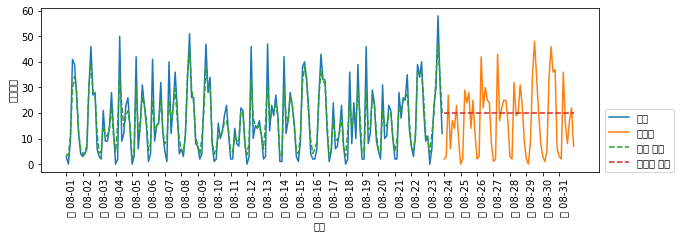

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
eval_on_features(X, y, regressor)

R^2가 -0.04로 학습이 되지 않음
트리 모델인 랜덤 포레스트는 훈련 세트에 있는 특성의 범위 밖으로 외삽이 할 수 있는 능력이 없음
> 여기서 전문가 지식이 필요함

**POSIX 시간으로는 아무것도 학습x --> 시간만 학습**


테스트 세트 R^2: 0.60


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

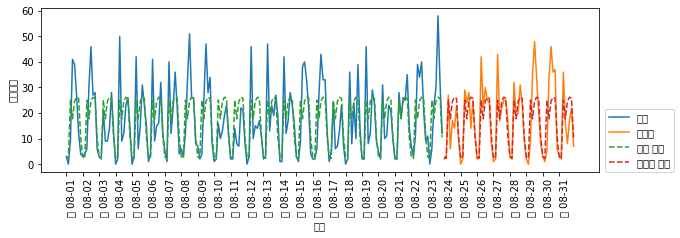

In [54]:
X_hour = citibike.index.hour.values.reshape(-1,1)
eval_on_features(X_hour, y, regressor)

#주간 패턴은 예측하지 못하고 있음 -> 요일 정보 추가

테스트 세트 R^2: 0.84


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

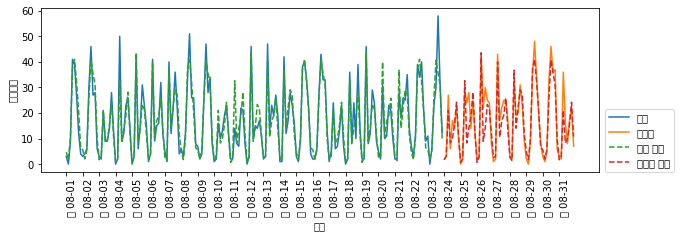

In [55]:
X_hour_week = np.hstack([citibike.index.dayofweek.values.reshape(-1,1), citibike.index.hour.values.reshape(-1,1)])
eval_on_features(X_hour_week, y, regressor)

테스트 세트 R^2: 0.13


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

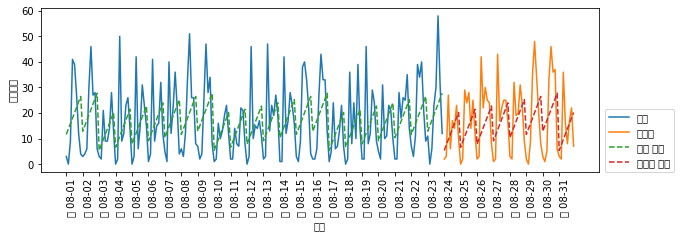

In [56]:
#간단한 모델인 LinearRegression사용

from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

요일과 시간이 정수로 인코딩 되어 있어 연속형 변수로 해석된다. -> onehotencoder을 사용하여 범주형 변수로 해석하게 함

테스트 세트 R^2: 0.62


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

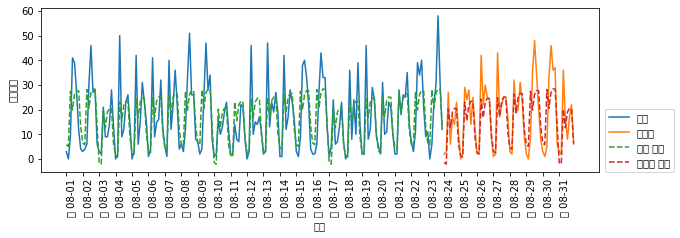

In [57]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()

eval_on_features(X_hour_week_onehot, y, Ridge())

요일마다 하나의 계수를 학습하고, 시간마다 하나의 계수를 학습한다.
> 시간 패턴이 모든 날에 걸쳐 공유된다. 
> 상호작용 특성을 이용하면 요일의 조합벽 계수를 학습할 수 있음

테스트 세트 R^2: 0.85


C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from c

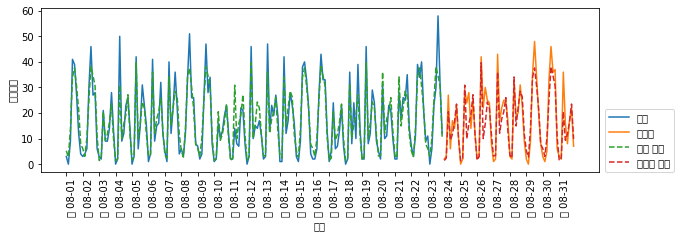

In [59]:
poly_transformer = PolynomialFeatures(degree = 2, interaction_only = True, include_bias = False)
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

랜덤 포레스트와 비슷한 결과가 나옴
선형 모델은 랜덤 포레스트와는 달리 학습한 계수가 명확해 그래프로 나타낼 수 있음

In [60]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["월", "화", "수","목","금","토","일"]
features = day+hour

features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ !=0]
coef_nonzero = lr.coef_[lr.coef_ !=0]


Text(0, 0.5, '계수 크기')

C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\dkstj\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53664 missing from c

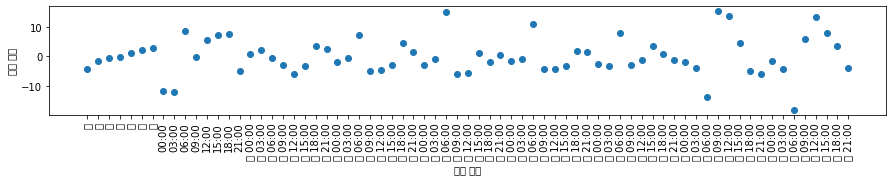

In [61]:
plt.figure(figsize = (15,2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation = 90)
plt.xlabel("특성 이름")
plt.ylabel("계수 크기")